# 3주차 스터디 과제

In [16]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

### 데이터 전처리 실습

**연습문제 1**

아래의 지시대로 연습문제를 진행하시면 됩니다

In [17]:
# 사용할 데이터셋을 불러오겠습니다 -> 팽귄 데이터셋을 사용합니다
from seaborn import load_dataset

peng_df = load_dataset("penguins")
peng_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [18]:
# 1-1) bill_length_mm/ bill_depth_mm / flipper_length_mm / body_mass_g 에 결측값이 존재합니다 -> 각각의 평균을 NaN 값에 넣어줍시다
## 주의! 서식지(island), 성별(sex)과 팽귄의 종류(species)의 평균은 아무런 의미를 가지지 않기 때문에 내버려 두어야 합니다!!

#  연습 1-1번 코드

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
peng_df[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]] = imputer.fit_transform(peng_df[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]])

peng_df.head()

## 또다른 방식 (이찬희)
#peng_df = peng_df.fillna(peng_df.mean())

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female


In [19]:
peng_df.fillna(peng_df.mean())

C:\Users\user\AppData\Local\Temp\ipykernel_10848\1237842584.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  peng_df.fillna(peng_df.mean())


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4201.754386,NaN
340,Gentoo,Biscoe,46.80000,14.30000,215.000000,4850.000000,Female
341,Gentoo,Biscoe,50.40000,15.70000,222.000000,5750.000000,Male
342,Gentoo,Biscoe,45.20000,14.80000,212.000000,5200.000000,Female


In [20]:
peng_df.dropna().reset_index(drop=True)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
329,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
330,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
331,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [21]:
# 1-2) 앞서 평균값을 삽입해주었지만, 서식지와 성별과 팽귄의 종에는 아무런 천처리를 하지 않았습니다. 
## 이들에 NaN값이 있다면, 단순히 drop 시켜주도록 합시다

# 연습 1-2번 코드
peng_df.dropna(inplace=True)

# dropna를 해서 인덱스가 중간중간 비기 때문에(EX, 3번째 데이터가 dropna로 떨어져 나갔기 때문에, 인덱스가 0 1 2 4 이런식으로 된다) reset_index를 해준다
## 왜 drop=True를 해주는 지는, drop=True를 빼고 reset_index를 해보면 알 수 있다
peng_df.reset_index(drop=True, inplace=True)

peng_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


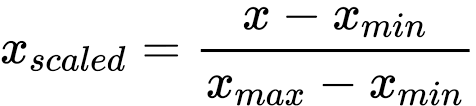

In [22]:
# 결측치 처리가 이제 완료되었습니다.
## 부리 길이, 부리 두께, 지느러미 길이, 몸무게 특성에 스케일링을 적용해 보겠습니다

### 1-3) 우선 위의 공식을 참고해, 넘파이로 body_mass_g를 직접 min_max_scaling해 봅시다 (위 이미지가 보이지 않는다면 구글에 minmaxscaling을 검색하면 공식이 나옵니다)

# 연습 1-3 코드

# 최대,최소 구하기 -> 두 방법 중 어떤 식으로 하든 상관없습니다
min = peng_df['body_mass_g'].min()
max = np.max(peng_df['body_mass_g'])

# min_max scaling 적용  (기존에 존재하던 body_mass_g에 덮어쓰기보다, 컬럼 이름을 달리하여 "body_mass_g_minmax"처럼 새롭게  컬럼명을 저장하는 것이 좋습니다 -> 기존 데이터를 또 다시 쓸 일이 있을 수도 있음)
peng_df['body_mass_g_minmax'] = (peng_df['body_mass_g'] - min) / (max - min)

# body_mass_g_minmax가 추가된 것을 확인 할 수 있습니다
peng_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,body_mass_g_minmax
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0.291667
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0.305556
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0.152778
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0.208333
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,0.263889


In [23]:
# 1-4) 나머지 특성(부리길이, 부리두께, 지느러미길이)은 싸이킷런을 사용해 정규화(Normalization)해 봅시다

# 연습 1-4 코드

from sklearn.preprocessing import Normalizer

normal = Normalizer()

# 여기서도 똑같이 컬럼 이름을 바꿔서 저장해주는 것이 좋습니다
peng_df[["bill_length_mm_norm","bill_depth_mm_norm","flipper_length_mm_norm"]] = normal.fit_transform(peng_df[["bill_length_mm","bill_depth_mm","flipper_length_mm"]])

peng_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,body_mass_g_minmax,bill_length_mm_norm,bill_depth_mm_norm,flipper_length_mm_norm
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0.291667,0.210083,0.100474,0.972507
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0.305556,0.206869,0.091127,0.974116
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0.152778,0.201568,0.090030,0.975328
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0.208333,0.185913,0.097769,0.977690
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,0.263889,0.201422,0.105580,0.973798


### 2. 오버피팅을 직접 경험해보자

**연습문제 2**

적합한 피팅은 2차식일 때

데이터를 100차식으로 변환시켜서 회귀를 하면 오버피팅 되는 것을 확인할 수 있습니다

In [24]:
import numpy as np

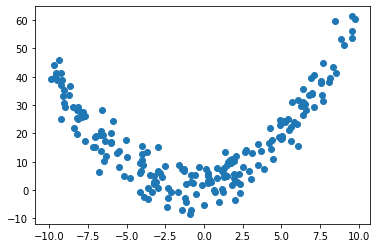

In [40]:
# 우선 회귀를 하기 위해서 임의의 데이터를 생성하겠습니다
np.random.seed(10)

# 수정사항있음(과제오표기)
n = 200
X = 20 * np.random.rand(n,1) - 10
y = 0.5*X**2 + X + 2 + (5* np.random.randn(n,1))
plt.scatter(X,y);
# 이 데이터는 눈으로 봤을 때 2차식곡선으로 피팅하는 것이 제일 적합해 보입니다. 하지만, 만약 100차식으로 피팅한다면 어떻게 될까요?

In [26]:
# 2-1) 데이터(X,y)를 train_set과 test_set으로 분리해봅시다. (동일한 결과를 위해 random_state=10 으로 지정해주세요)

# 연습 2-1 코드
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X,y, random_state=10)

In [27]:
# 2-2) 싸이킷런의 PolynomialFeature를 사용해, 데이터를 100차식으로 변환해줍시다(편향(bias)은 포함하지 않습니다)
## 주의 1) train_set과 test_set을 둘 다 변환시켜줘야 하는 것을 잊지 마세요! (X_train을 X_train_poly, X_test를 X_test_poly 이름으로 받아주세요)
## 주의 2) y는 정답지라서 당연히 변환하면 안됩니다!

# 연습 2-2코드
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=100, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

X_test_poly

array([[-4.97251732e+00,  2.47259285e+01, -1.22950107e+02, ...,
         1.83856000e+68, -9.14227142e+68,  4.54601029e+69],
       [-5.50406709e+00,  3.02947545e+01, -1.66744361e+02, ...,
         3.86370938e+72, -2.12661156e+73,  1.17050127e+74],
       [ 8.50887360e-01,  7.24009300e-01,  6.16050362e-01, ...,
         1.34110595e-07,  1.14113010e-07,  9.70973180e-08],
       ...,
       [-8.13119246e+00,  6.61162908e+01, -5.37604286e+02, ...,
         1.56716812e+89, -1.27429456e+90,  1.03615344e+91],
       [ 9.75250950e+00,  9.51114415e+01,  9.27575237e+02, ...,
         8.57838297e+96,  8.36607614e+97,  8.15902370e+98],
       [-7.83872454e+00,  6.14456025e+01, -4.81655152e+02, ...,
         4.32563169e+87, -3.39074353e+88,  2.65791045e+89]])

In [28]:
# 2-3) 싸이킷런의 LinearRegression으로 100차식으로 변환한 X_train_poly와 y_train를 회귀해 봅시다 / 회귀 후 X_train_poly에 대한 score를 출력해봅시다

# 연습 2-3코드
from sklearn.linear_model import LinearRegression

linear = LinearRegression(n_jobs=-1)
linear.fit(X_train_poly,y_train)
linear.score(X_train_poly, y_train)

0.33569604462890523

In [29]:
# 2-4) X_test_poly에 대한 score를 출력해 봅시다 -> train_set의 점수와 test_set의 점수가 크게 차이나는 것이 보이시나요?(오버피팅)

# 연습 2-4코드
linear.score(X_test_poly,y_test)

-32354.61556832827

In [30]:
# 2-5) 자 이번에는 싸이킷런의 PolynomialFeature를 사용해, 데이터를 2차식으로 변환해줍시다(편향(bias)은 포함하지 않습니다)
## 주의 1) train_set과 test_set을 둘 다 변환시켜줘야 하는 것을 잊지 마세요! (X_train을 X_train_poly, X_test를 X_test_poly 이름으로 받아주세요)
## 주의 2) y는 정답지라서 당연히 변환하면 안됩니다!

# 연습 2-5코드
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

X_train_poly.shape

(150, 2)

In [31]:
# 2-6) 2차식으로 변환하기 이전의 기존 데이터(X_train)와 y_train를 회귀해 봅시다 / 회귀 후 X_train에 대한 score를 구해봅시다

# 연습 2-6코드
linear_model = LinearRegression()
linear_model.fit(X_train_poly,y_train)

linear_model.score(X_train_poly, y_train)

0.9017064476054759

In [32]:
# 2-6) X_test에 대한 score를 출력해 봅시다 -> X_test의 점수와 X_train의 점수 근접한 것이 보이시나요?(적합한 피팅)

linear_model.score(X_test_poly, y_test)

0.9009694114108471

### 3. 단순한 선형회귀를 넘어 규제항이 포함된 회귀를 해보자

* Ridge / Lasso / ElasticNet이 있습니다 (일반적인 선형회귀를 OLS라 부릅니다)

* Lasso는 L1규제, Ridge는 L2규제, ElasticNet은 둘을 합친 규제가 들어간 선형회귀입니다

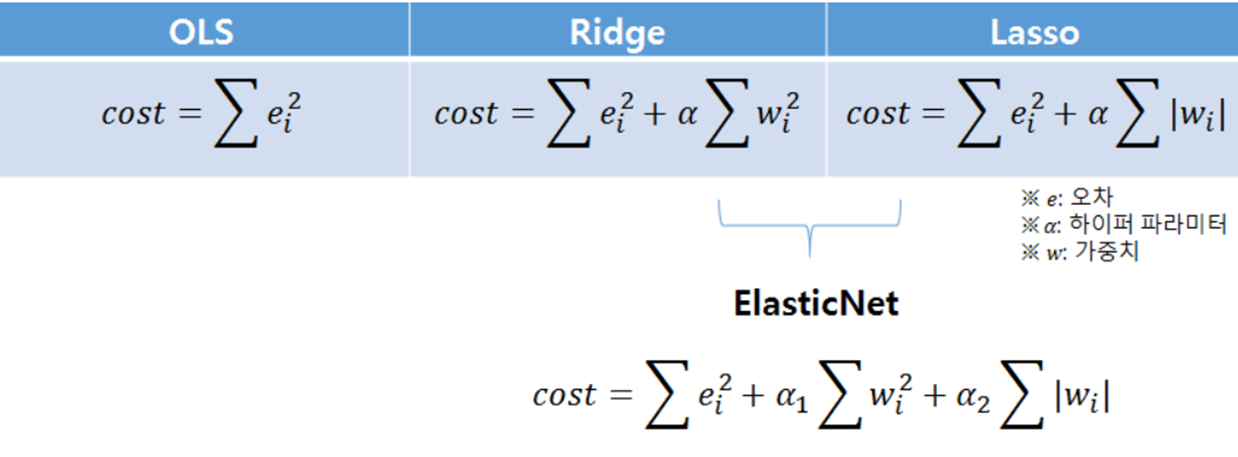


* 그림에서 볼 수 있듯, 일반적인 회귀 공식에 규제항이 뒤에 더해진 것을 볼 수 있습니다. 규제항에 붙은 알파($a$)로 규제의 정도를 조절합니다($a=0$ 이면 릿지나 라쏘는 일반 선형회귀와 동일합니다!)

* https://www.geeksforgeeks.org/lasso-vs-ridge-vs-elastic-net-ml/ -> 필수는 아님! 이에 대한 설명입니다

In [33]:
# 연습문제 3) 알파를 1로 설정한 라쏘 회귀를 X_train_poly(2차식), y_train을 사용해서 회귀해봅시다 / 이후 X_test_poly(2차식), y_test에 대한 score를 출력해 봅시다

# 연습문제 3-1코드
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1)
lasso.fit(X_train_poly,y_train)
lasso.score(X_test_poly,y_test)

0.9028726382057541

In [34]:
# 연습문제 3-2) l1_ratio를 1으로 설정한 엘라스틱넷 회귀를 X_train_poly(2차식), y_train을 사용해서 회귀해봅시다 / 이후 X_test_poly(2차식), y_test에 대한 score를 출력해 봅시다

# 연습문제 3-2 코드
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(l1_ratio=1)
elastic.fit(X_train_poly,y_train)
elastic.score(X_test_poly,y_test)

0.9028726382057541

In [35]:
# 연습문제 3-3) 왜 3-1번의 회귀와 3-2의 회귀의 score가 같을까요???

# l1_ratio가 1인 엘라스틱 넷 회귀는 수학적으로 라쏘와 동일해서 (손실함수가 동일해진다)